# Visualization of the test data

## Overview

The initial test data contains a log-file with integral bubble data like position and rise velocity, as well as snapshots of the front-points at seveal time instances.

The log-file columns (18 in total) are abbreviated as follows:

| index | log-name (unit)   | abbreviation |
|:--: | :---------------- | :----------- |
| 0   | Time (s)          | t            |
| 1   | Bubble velocity x-dir (m/s) | ub_x |
| 2   | Bubble velocity y-dir (m/s) | ub_y |
| 3   | Bubble velocity z-dir (m/s) | ub_z |
| 4   | Bubble volume (m^3) | vb |
| 5   | Centre of mass x (m) | cb_x |
| 6   | Centre of mass y (m) | cb_y |
| 7   | Centre of mass z (m) | cb_z |
| 8   | Max. dimensions db_x (m) | db_x |
| 9   | Max. dimensions db_y (m) | db_y |
| 10  | Max. dimensions db_z (m) | db_z |
| 11  | Remeshing Added | rm_add    |
| 12  | Remeshing Removed | rm_rem  |
| 13  | Remeshing Pyramids | rm_pyr |
| 14  | Pressure Jump (Pa) | p_jump |
| 15  | Local liquid velocity x-dir (m/s) | ul_x |
| 16  | Local liquid velocity y-dir (m/s) | ul_y |
| 17  | Local liquid velocity z-dir (m/s) | ul_z |

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from glob import glob

%matplotlib inline
mpl.rcParams['figure.dpi'] = 160

data_path = "../data/test/"
output_path = "../output/"

!mkdir -p $output_path

## Log-file data

In [2]:
def read_fortran_formatting(path, first_row):
    with open(path, "r") as file:
        all_rows = file.readlines()
        all_rows_clean = []
        for row in all_rows[first_row:]:
            tokens = row.split(" ")
            all_rows_clean.append([float(x) for x in tokens if x not in ["", "\n"]])
        return all_rows_clean

In [3]:
columns = [
    "t",
    "ub_x", "ub_y", "ub_z",
    "vb",
    "cb_x", "cb_y", "cb_z",
    "db_x", "db_y", "db_z",
    "rm_add", "rm_rem", "rm_pyr",
    "p_jump",
    "ul_x", "ul_y", "ul_z"
]

log_name = "bub0000.log"
raw_data = read_fortran_formatting(data_path + log_name, first_row=5)
    
log_data = pd.DataFrame(np.asarray(raw_data), columns=columns)
log_data.head()

,t,ub_x,ub_y,ub_z,vb,cb_x,cb_y,cb_z,db_x,db_y,db_z,rm_add,rm_rem,rm_pyr,p_jump,ul_x,ul_y,ul_z
0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.524552e-07,0.022095,0.014141,0.014141,0.006628,0.006628,0.006628,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
1,5.040000e-07,0.000009,-1.380090e-11,2.059465e-08,1.524552e-07,0.022095,0.014141,0.014141,0.006629,0.006628,0.006628,6.0,2420.0,0.0,1287.539195,0.000003,-6.097727e-12,1.079810e-08
2,1.008000e-06,0.000019,1.124171e-09,4.114838e-08,1.524552e-07,0.022095,0.014141,0.014141,0.006629,0.006628,0.006628,88.0,2922.0,0.0,1287.546317,0.000005,1.496766e-10,2.245090e-08
3,1.512000e-06,0.000028,1.509434e-09,6.290326e-08,1.524552e-07,0.022095,0.014141,0.014141,0.006629,0.006628,0.006628,112.0,3138.0,0.0,1287.548788,0.000008,1.961760e-10,3.391560e-08
4,2.016000e-06,0.000037,2.087592e-09,8.542363e-08,1.524552e-07,0.022095,0.014141,0.014141,0.006629,0.006628,0.006628,120.0,3258.0,0.0,1287.550408,0.000011,2.792239e-10,4.450407e-08


## Interface data snapshots

In [4]:
snapshot_base_name = "PointData"
snapshot_file_paths = sorted(glob(data_path + snapshot_base_name + "*.dat"))
snapshot_files = []
columns = ["x", "y", "z", "vx", "vy", "vz", "nx", "ny", "nz"]

for path in snapshot_file_paths:
    data = read_fortran_formatting(path, first_row=1)
    snapshot_files.append(pd.DataFrame(np.asarray(data), columns=columns))
    
print("Read {} snapshot files from disk.".format(len(snapshot_files)))
snapshot_files[0].head()

Read 10 snapshot files from disk.


,x,y,z,vx,vy,vz,nx,ny,nz
0,0.022096,0.014139,0.017454,-0.003758,-0.000003,0.000079,0.012615,0.006940,0.999896
1,0.022182,0.014139,0.017453,-0.007555,-0.000011,0.000509,0.012615,0.006940,0.999896
2,0.022140,0.014213,0.017453,-0.011365,0.000012,0.000730,0.012615,0.006940,0.999896
3,0.022054,0.014214,0.017453,-0.015185,0.000007,0.000623,-0.000244,0.014542,0.999894
4,0.022010,0.014140,0.017453,-0.019008,0.000007,0.000358,-0.013270,0.007182,0.999886


## Bubble shape

Bubble initialized as with with an equivalent diameter of 6.628475e-03m


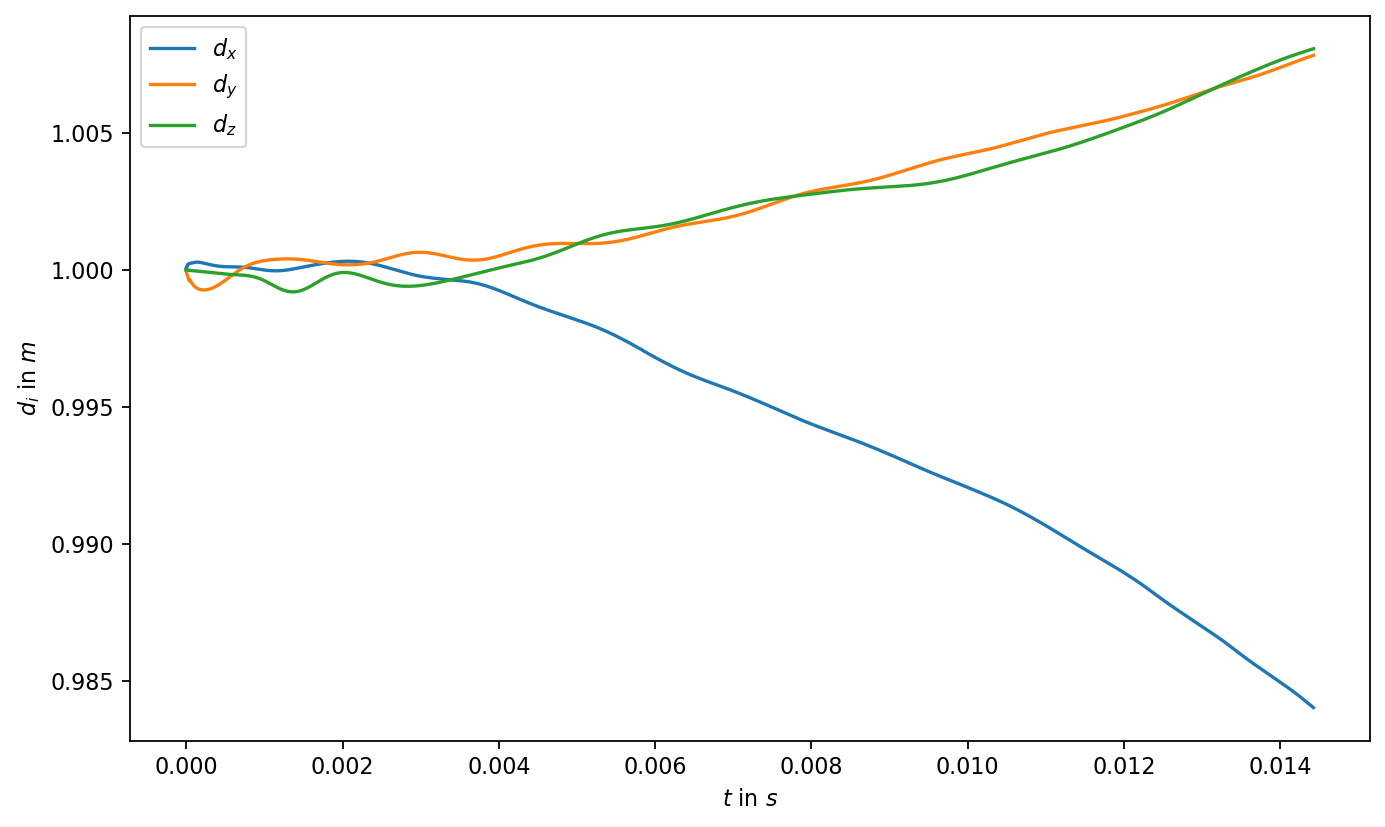

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# equivalent bubble diameter
db_eq = log_data.db_x.values[0]
print("Bubble initialized as with with an equivalent diameter of {:e}m".format(db_eq))

ax.plot(log_data.t, log_data.db_x/db_eq, label=r"$d_x$")
ax.plot(log_data.t, log_data.db_y/db_eq, label=r"$d_y$")
ax.plot(log_data.t, log_data.db_z/db_eq, label=r"$d_z$")

ax.set_xlabel(r"$t$ in $s$")
ax.set_ylabel(r"$d_i$ in $m$")
ax.legend()
plt.show()

## Rise velocity

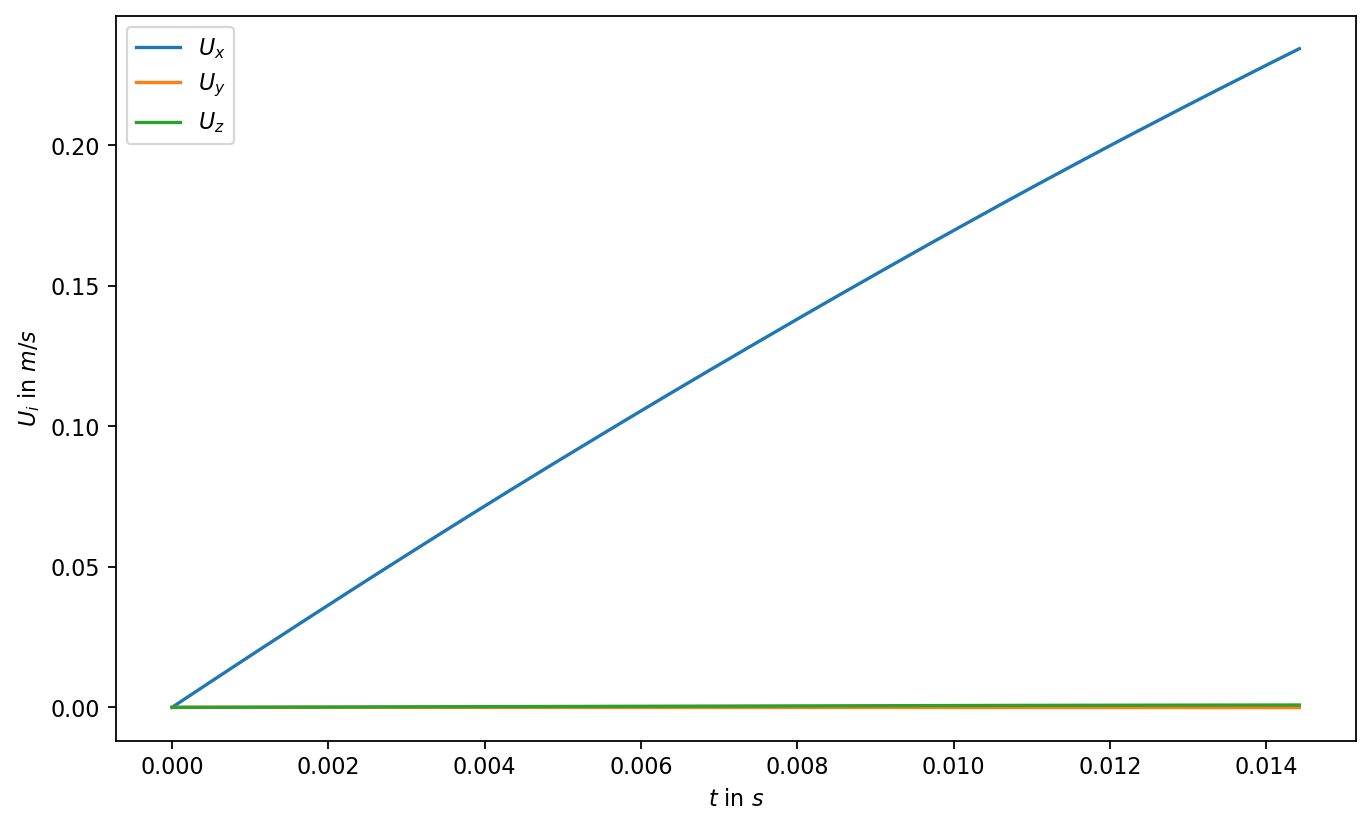

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(log_data.t, log_data.ub_x, label=r"$U_x$")
ax.plot(log_data.t, log_data.ub_y, label=r"$U_y$")
ax.plot(log_data.t, log_data.ub_z, label=r"$U_z$")

ax.set_xlabel(r"$t$ in $s$")
ax.set_ylabel(r"$U_i$ in $m/s$")
ax.legend()
plt.show()

## Bubble volume

1.5248931510684025e-07


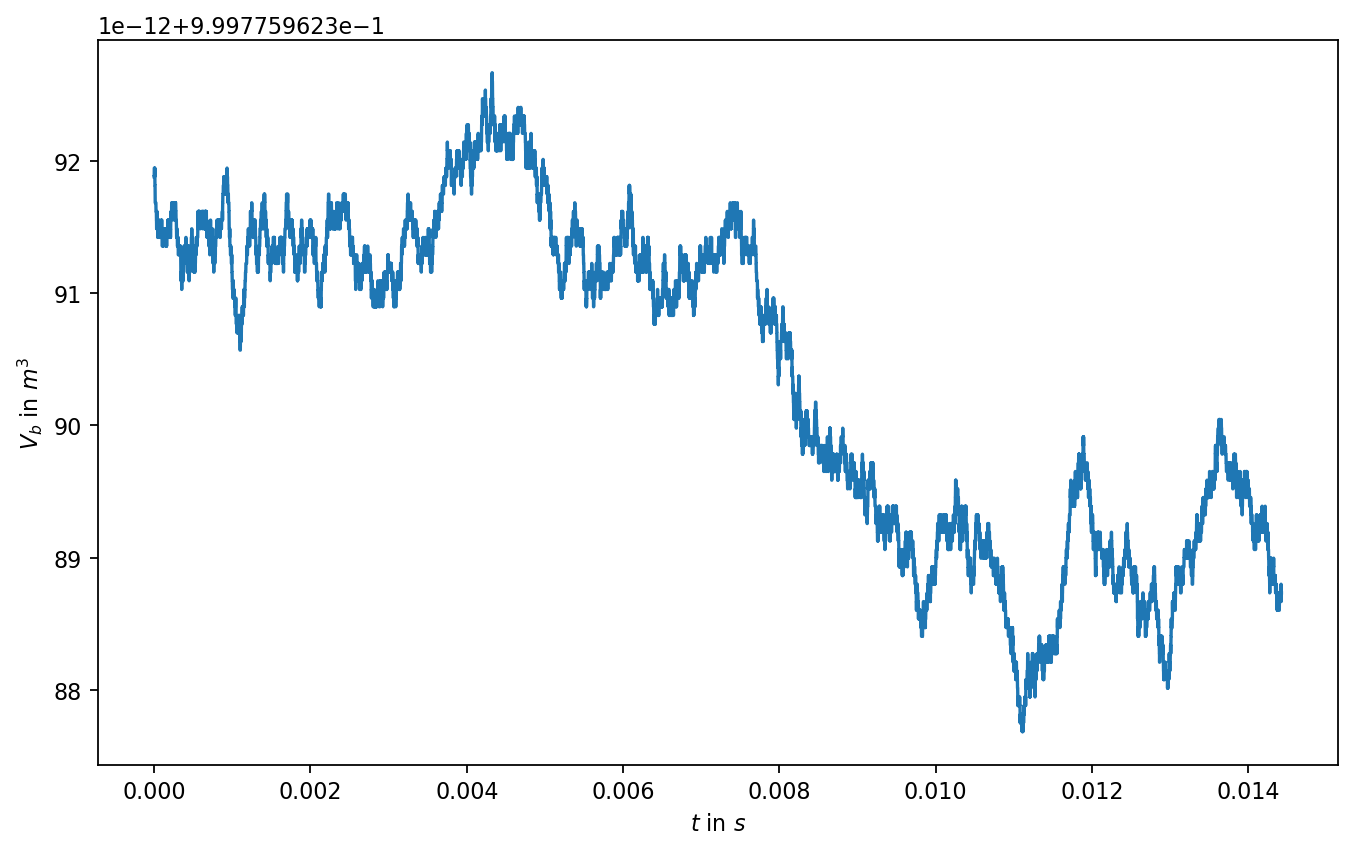

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

vb_eq = np.pi/6.0 * db_eq**3
print(vb_eq)
ax.plot(log_data.t, log_data.vb/vb_eq, label=r"$V_b$")

ax.set_xlabel(r"$t$ in $s$")
ax.set_ylabel(r"$V_b$ in $m^3$")
plt.show()

## Center of mass

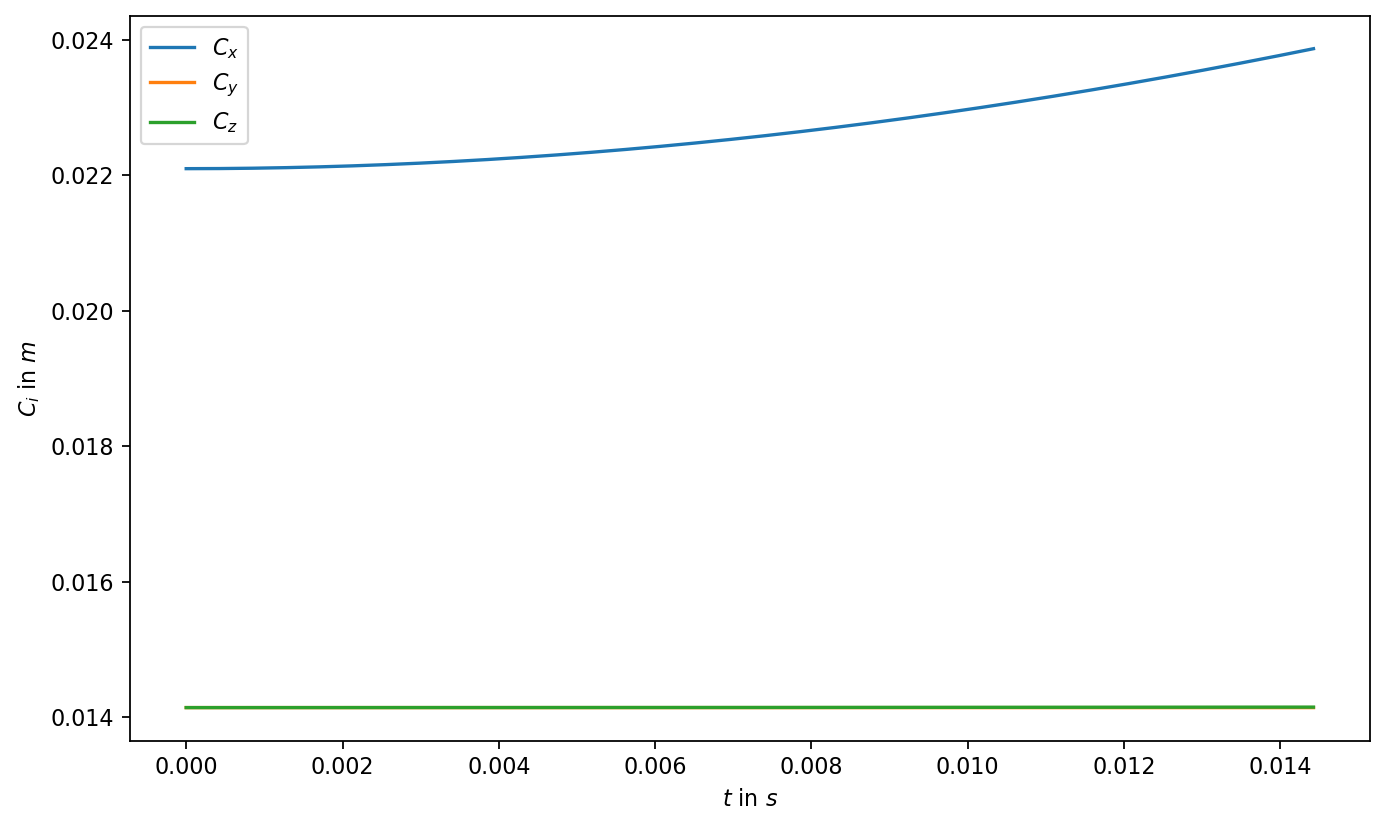

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(log_data.t, log_data.cb_x, label=r"$C_x$")
ax.plot(log_data.t, log_data.cb_y, label=r"$C_y$")
ax.plot(log_data.t, log_data.cb_z, label=r"$C_z$")

ax.set_xlabel(r"$t$ in $s$")
ax.set_ylabel(r"$C_i$ in $m$")
ax.legend()
plt.show()

## Interfacial points as point cloud

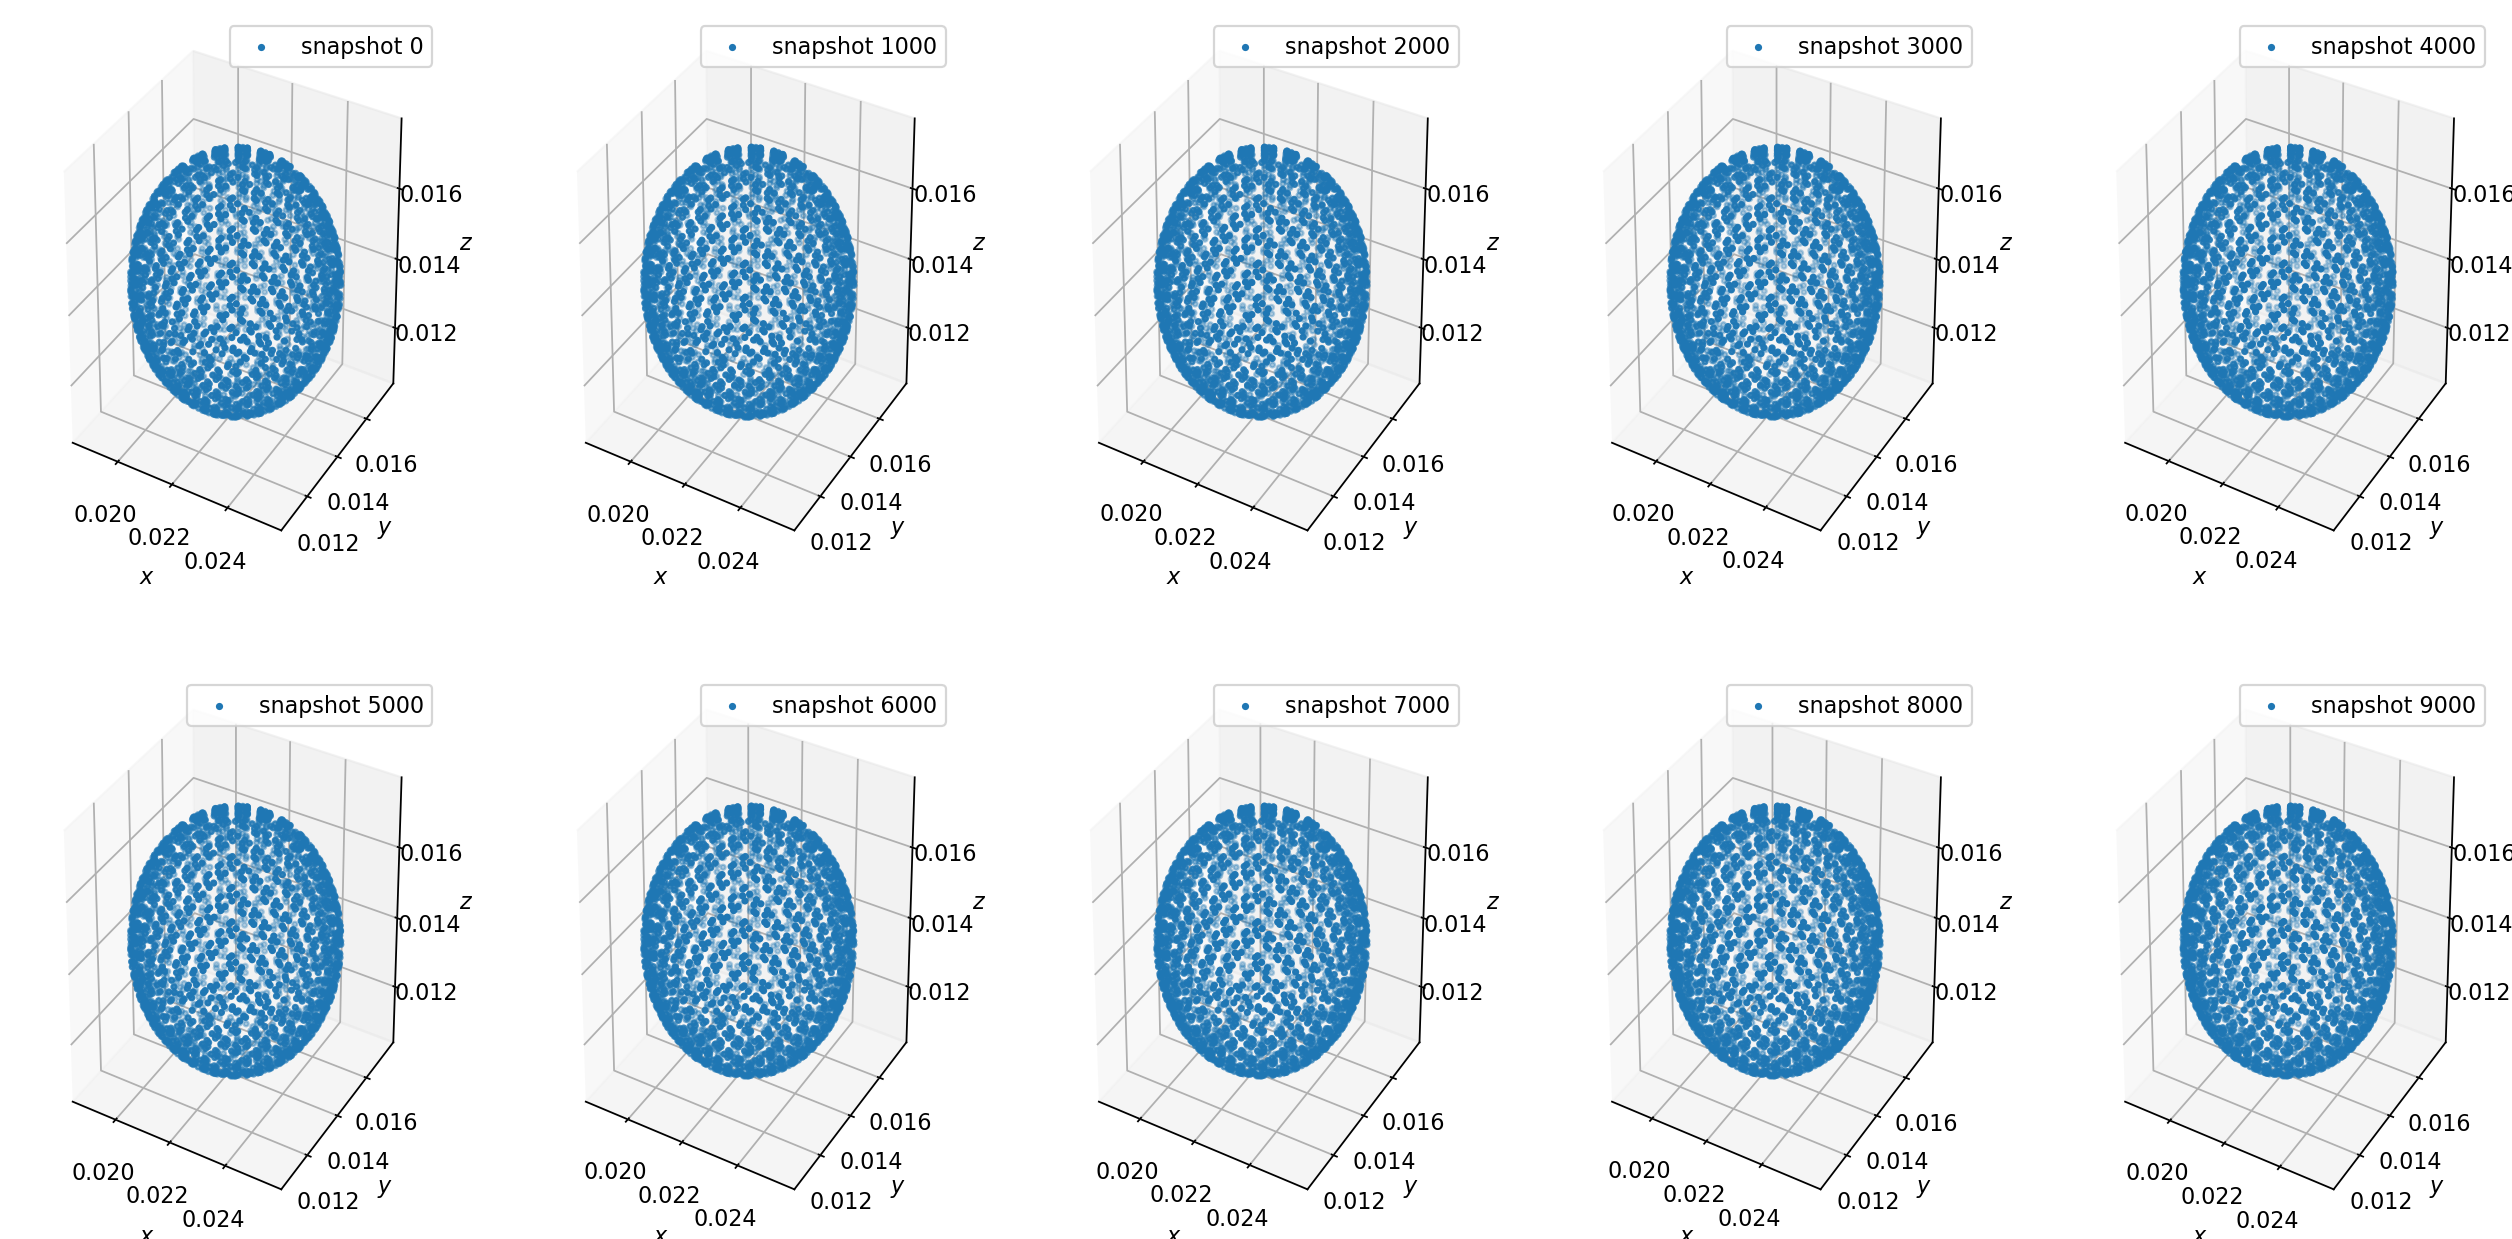

In [9]:
fig, axarr = plt.subplots(2, 5, figsize=(20, 10),subplot_kw=dict(projection='3d'))

indices = [(i, j) for i in range(2) for j in range(5)]
every = 10

for i, snp in enumerate(snapshot_files):
    row = indices[i][0]
    col = indices[i][1]
    axarr[row, col].scatter(snp.x[::every], snp.y[::every], snp.z[::every], s=5, label="snapshot {:d}".format(i*1000))
    axarr[row, col].legend()
    axarr[row, col].set_xlabel(r"$x$")
    axarr[row, col].set_ylabel(r"$y$")
    axarr[row, col].set_zlabel(r"$z$")

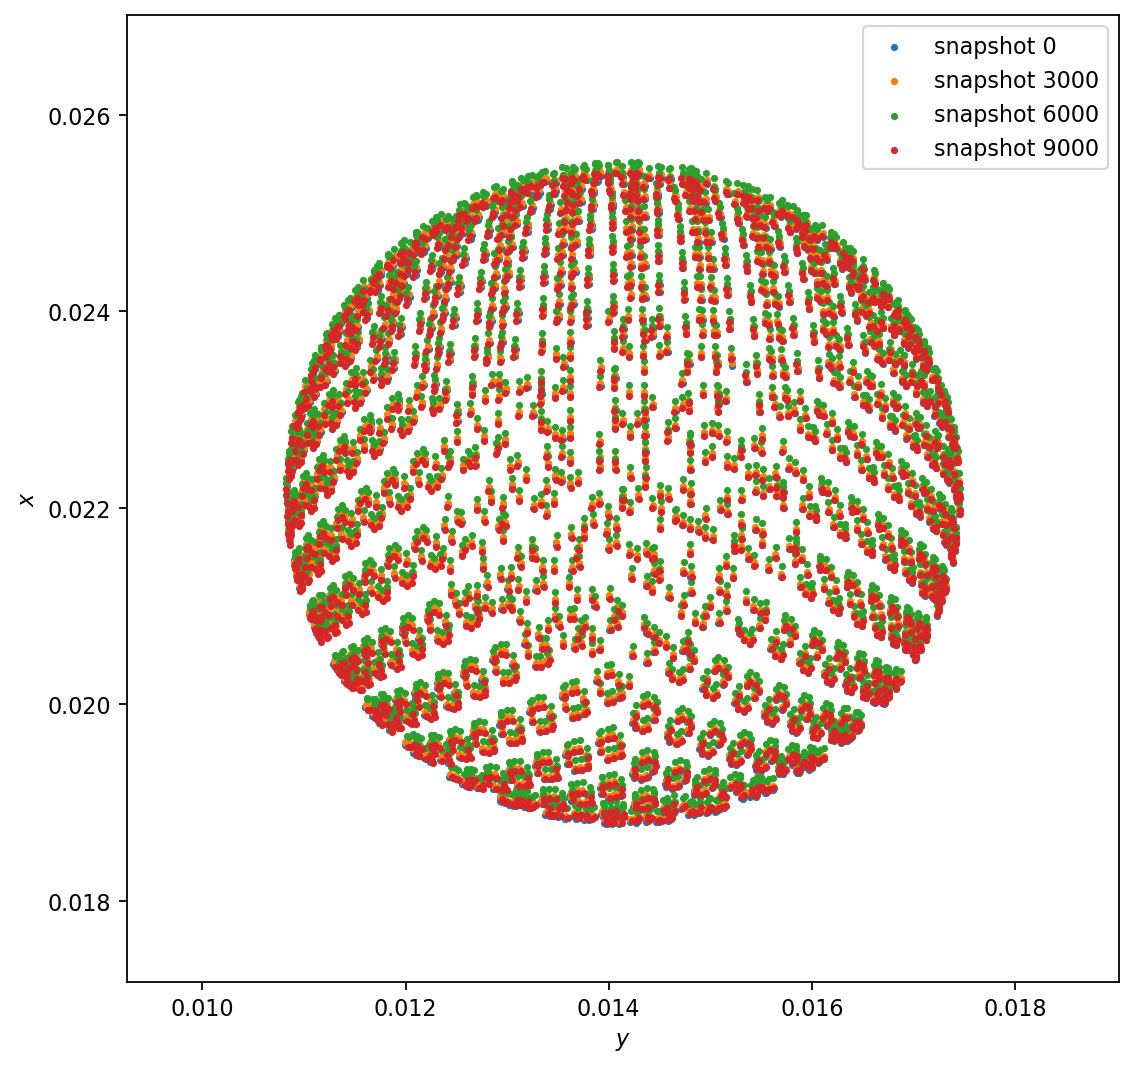

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

every_p = 10
every_snp = 3

for i, snp in enumerate(snapshot_files[::every_snp]):
    ax.scatter(snp.y[::every_p], snp.x[::every_p], s=5, color="C{:1d}".format(i),
               label="snapshot {:d}".format(i*1000*every_snp))

ax.set_xlabel(r"$y$")
ax.set_ylabel(r"$x$")
ax.legend()